In [10]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [11]:

# Step 2: Load the dataset
df = pd.read_csv("Data.csv")  # Place this file in same directory as this notebook


In [12]:

# Step 3: Replace '?' with NaN and drop unwanted columns
df.replace('?', np.nan, inplace=True)
df.drop(columns=['fnlwgt', 'educational-num'], inplace=True)

In [13]:

# Step 4: Fill missing values with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\MukundKumarGupta\AppData\Local\Temp\ipykernel_24360\251912992.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
# Feature Engineering
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
df['capital-gain'] = df['capital-gain'].astype(int).apply(lambda x: np.log1p(x))
df['capital-loss'] = df['capital-loss'].astype(int).apply(lambda x: np.log1p(x))
df['age'] = np.where(df['age'] > 75, 75, df['age'])
df['hours-per-week'] = np.where(df['hours-per-week'] > 80, 80, df['hours-per-week'])


In [15]:

# Split features/target
X = df.drop('income', axis=1)
y = df['income']

In [16]:

# Identify columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [17]:

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [20]:

# Classifier dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [21]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:

# Train, evaluate, compare
results = {}

for name, model in models.items():
    print(f"\n{name}")
    
    clf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    clf_pipeline.fit(X_train, y_train)
    y_pred = clf_pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    results[name] = acc



Logistic Regression


C:\Users\MukundKumarGupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8509571092230526
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7479
           1       0.72      0.59      0.65      2290

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.85      9769


Decision Tree
Accuracy: 0.8230115672023749
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      7479
           1       0.62      0.62      0.62      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769


Random Forest
Accuracy: 0.8513665677141979
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      7479
           1       0.70      0.63      0.67     

C:\Users\MukundKumarGupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [03:24:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


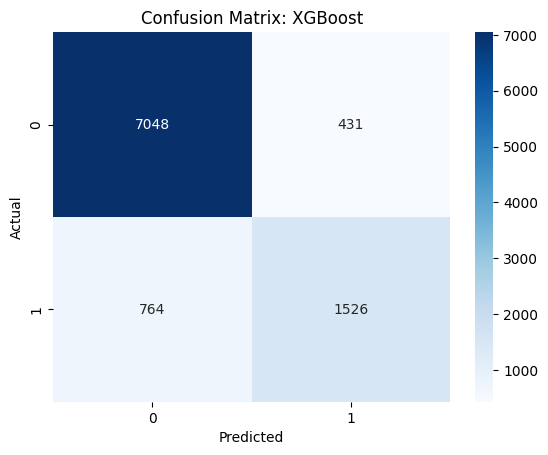

In [23]:

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [24]:

# Best model
best_model = max(results, key=results.get)
print(f"\n✅ Best Model: {best_model} with Accuracy: {results[best_model]:.4f}")


✅ Best Model: XGBoost with Accuracy: 0.8777


StreamlitApp Building

In [28]:
import joblib
from xgboost import XGBClassifier

# Final model pipeline using best model 
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Fit on full training data
final_model.fit(X_train, y_train)

# Save pipeline to disk
joblib.dump(final_model, "best_model.pkl")
print("✅ Model saved as best_model.pkl")

✅ Model saved as best_model.pkl


C:\Users\MukundKumarGupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [03:35:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
